# IPl winner Predictor

In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [267]:
deliveries=pd.read_csv('deliveries.csv')

In [268]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [269]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [270]:
deliveries.duplicated().sum()

0

In [271]:
deliveries.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [272]:
deliveries.shape

(260920, 17)

In [273]:
matches=pd.read_csv('matches.csv')

In [274]:
matches.sample(5)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
535,980937,2016,Rajkot,2016-04-24,League,V Kohli,Saurashtra Cricket Association Stadium,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Gujarat Lions,wickets,6.0,181.0,20.0,N,NaN,K Bharatan,BNJ Oxenford
482,829757,2015,Delhi,2015-04-26,League,VR Aaron,Feroz Shah Kotla,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,10.0,96.0,20.0,N,NaN,M Erasmus,S Ravi
579,1082593,2017,Rajkot,2017-04-07,League,CA Lynn,Saurashtra Cricket Association Stadium,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,10.0,184.0,20.0,N,NaN,Nitin Menon,CK Nandan
897,1304068,2022,Mumbai,2022-04-12,League,S Dube,"Dr DY Patil Sports Academy, Mumbai",Chennai Super Kings,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Chennai Super Kings,runs,23.0,217.0,20.0,N,NaN,Nitin Menon,N Pandit
887,1304058,2022,Mumbai,2022-04-04,League,Avesh Khan,"Dr DY Patil Sports Academy, Mumbai",Lucknow Super Giants,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Lucknow Super Giants,runs,12.0,170.0,20.0,N,NaN,J Madanagopal,Navdeep Singh


In [275]:
matches.duplicated().sum()

0

In [276]:
matches.isna().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [277]:
deliveries.info(),matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

(None, None)

In [278]:
matches.shape

(1095, 20)

# checking the score of total match and validating apprently matches score are coming 1+ becuse it is target run 
   our total_run groubyfunction is working awsomee 

In [279]:
deliveries.groupby(['match_id','inning','batting_team',])['total_runs'].sum().reset_index().merge(matches.groupby(['id','winner','date']).sum()['target_runs'],left_on='match_id',right_on='id',how='outer').tail(10)

,match_id,inning,batting_team,total_runs,target_runs
2207,1426307,1,Punjab Kings,214,215.0
2208,1426307,2,Sunrisers Hyderabad,215,215.0
2209,1426309,1,Sunrisers Hyderabad,159,160.0
2210,1426309,2,Kolkata Knight Riders,164,160.0
2211,1426310,1,Royal Challengers Bengaluru,172,173.0
2212,1426310,2,Rajasthan Royals,174,173.0
2213,1426311,1,Sunrisers Hyderabad,175,176.0
2214,1426311,2,Rajasthan Royals,139,176.0
2215,1426312,1,Sunrisers Hyderabad,113,114.0
2216,1426312,2,Kolkata Knight Riders,114,114.0


In [280]:
matches.groupby(['id','winner'])['target_runs'].sum()

id       winner                     
335982   Kolkata Knight Riders          223.0
335983   Chennai Super Kings            241.0
335984   Delhi Daredevils               130.0
335985   Royal Challengers Bangalore    166.0
335986   Kolkata Knight Riders          111.0
                                        ...  
1426307  Sunrisers Hyderabad            215.0
1426309  Kolkata Knight Riders          160.0
1426310  Rajasthan Royals               173.0
1426311  Sunrisers Hyderabad            176.0
1426312  Kolkata Knight Riders          114.0
Name: target_runs, Length: 1090, dtype: float64

# making dataframe 

In [281]:
total_score=deliveries.groupby(['match_id','inning','batting_team',])['total_runs'].sum().reset_index()

In [282]:
total_score

,match_id,inning,batting_team,total_runs
0,335982,1,Kolkata Knight Riders,222
1,335982,2,Royal Challengers Bangalore,82
2,335983,1,Chennai Super Kings,240
3,335983,2,Kings XI Punjab,207
4,335984,1,Rajasthan Royals,129
...,...,...,...,...
2212,1426310,2,Rajasthan Royals,174
2213,1426311,1,Sunrisers Hyderabad,175
2214,1426311,2,Rajasthan Royals,139
2215,1426312,1,Sunrisers Hyderabad,113


In [283]:
total_score=total_score[total_score['inning']==1]

In [284]:
total_score.tail()

,match_id,inning,batting_team,total_runs
2207,1426307,1,Punjab Kings,214
2209,1426309,1,Sunrisers Hyderabad,159
2211,1426310,1,Royal Challengers Bengaluru,172
2213,1426311,1,Sunrisers Hyderabad,175
2215,1426312,1,Sunrisers Hyderabad,113


# i am keeping batting team column to check merge is done right or nottotal_score

In [285]:
match_df=matches.merge(total_score,left_on='id',right_on='match_id')

In [286]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [287]:
match_df[match_df['team1']=='Mumbai Indians']

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,inning,batting_team,total_runs
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,1,Mumbai Indians,165
12,335994,2007/08,Mumbai,2008-04-27,League,AC Gilchrist,Dr DY Patil Sports Academy,Mumbai Indians,Deccan Chargers,Deccan Chargers,...,155.0,20.0,N,NaN,Asad Rauf,SL Shastri,335994,1,Mumbai Indians,154
22,336004,2007/08,Mumbai,2008-05-04,League,SM Pollock,Dr DY Patil Sports Academy,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,...,163.0,20.0,N,NaN,IL Howell,RE Koertzen,336004,1,Mumbai Indians,162
26,336008,2007/08,Mumbai,2008-05-07,League,A Nehra,Dr DY Patil Sports Academy,Mumbai Indians,Rajasthan Royals,Mumbai Indians,...,104.0,20.0,N,NaN,DJ Harper,RE Koertzen,336008,1,Rajasthan Royals,103
35,336018,2007/08,Mumbai,2008-05-14,League,ST Jayasuriya,Wankhede Stadium,Mumbai Indians,Chennai Super Kings,Mumbai Indians,...,157.0,20.0,N,NaN,BR Doctrove,AM Saheba,336018,1,Chennai Super Kings,156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,1422132,2024,Mumbai,2024-04-01,League,TA Boult,"Wankhede Stadium, Mumbai",Mumbai Indians,Rajasthan Royals,Rajasthan Royals,...,126.0,20.0,N,NaN,MV Saidharshan Kumar,YC Barde,1422132,1,Mumbai Indians,125
1043,1422138,2024,Mumbai,2024-04-07,League,R Shepherd,"Wankhede Stadium, Mumbai",Mumbai Indians,Delhi Capitals,Delhi Capitals,...,235.0,20.0,N,NaN,HDPK Dharmasena,UV Gandhe,1422138,1,Mumbai Indians,234
1056,1426271,2024,Mohali,2024-04-18,League,JJ Bumrah,Maharaja Yadavindra Singh International Cricke...,Mumbai Indians,Punjab Kings,Punjab Kings,...,193.0,20.0,N,NaN,A Nand Kishore,VA Kulkarni,1426271,1,Mumbai Indians,192
1061,1426276,2024,Jaipur,2024-04-22,League,Sandeep Sharma,"Sawai Mansingh Stadium, Jaipur",Mumbai Indians,Rajasthan Royals,Mumbai Indians,...,180.0,20.0,N,NaN,AK Chaudhary,MV Saidharshan Kumar,1426276,1,Mumbai Indians,179


# adressing bais to the new team let see we will try to impute it later 

In [288]:
match_df[match_df['team1']=='Gujarat Titans']

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,inning,batting_team,total_runs
885,1304056,2022,Pune,2022-04-02,League,LH Ferguson,"Maharashtra Cricket Association Stadium, Pune",Gujarat Titans,Delhi Capitals,Delhi Capitals,...,172.0,20.0,N,NaN,KN Ananthapadmanabhan,UV Gandhe,1304056,1,Gujarat Titans,171
896,1304067,2022,Mumbai,2022-04-11,League,KS Williamson,"Dr DY Patil Sports Academy, Mumbai",Gujarat Titans,Sunrisers Hyderabad,Sunrisers Hyderabad,...,163.0,20.0,N,NaN,Chirra Ravikanthreddy,RJ Tucker,1304067,1,Gujarat Titans,162
899,1304070,2022,Mumbai,2022-04-14,League,HH Pandya,"Dr DY Patil Sports Academy, Mumbai",Gujarat Titans,Rajasthan Royals,Rajasthan Royals,...,193.0,20.0,N,NaN,CB Gaffaney,R Pandit,1304070,1,Gujarat Titans,192
910,1304081,2022,Navi Mumbai,2022-04-23,League,Rashid Khan,"Dr DY Patil Sports Academy, Mumbai",Gujarat Titans,Kolkata Knight Riders,Gujarat Titans,...,157.0,20.0,N,NaN,KN Ananthapadmanabhan,UV Gandhe,1304081,1,Gujarat Titans,156
923,1304094,2022,Navi Mumbai,2022-05-03,League,K Rabada,"Dr DY Patil Sports Academy, Mumbai",Gujarat Titans,Punjab Kings,Gujarat Titans,...,144.0,20.0,N,NaN,R Pandit,VK Sharma,1304094,1,Gujarat Titans,143
932,1304103,2022,Pune,2022-05-10,League,Shubman Gill,"Maharashtra Cricket Association Stadium, Pune",Gujarat Titans,Lucknow Super Giants,Gujarat Titans,...,145.0,20.0,N,NaN,KN Ananthapadmanabhan,MA Gough,1304103,1,Gujarat Titans,144
942,1304113,2022,Mumbai,2022-05-19,League,V Kohli,"Wankhede Stadium, Mumbai",Gujarat Titans,Royal Challengers Bangalore,Gujarat Titans,...,169.0,20.0,N,NaN,KN Ananthapadmanabhan,GR Sadashiv Iyer,1304113,1,Gujarat Titans,168
962,1359487,2023,Ahmedabad,2023-04-09,League,RK Singh,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Kolkata Knight Riders,Gujarat Titans,...,205.0,20.0,N,NaN,Nitin Menon,Tapan Sharma,1359487,1,Gujarat Titans,204
972,1359497,2023,Ahmedabad,2023-04-16,League,SO Hetmyer,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Rajasthan Royals,Rajasthan Royals,...,178.0,20.0,N,NaN,AK Chaudhary,CB Gaffaney,1359497,1,Gujarat Titans,177
979,1359504,2023,Lucknow,2023-04-22,League,MM Sharma,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Gujarat Titans,Lucknow Super Giants,Gujarat Titans,...,136.0,20.0,N,NaN,A Totre,RJ Tucker,1359504,1,Gujarat Titans,135


In [289]:
team=['Royal Challengers Bangalore',
      'Mumbai Indians',
      'Kolkata Knight Riders',
      'Lucknow Super Giants',
      'Rajasthan Royals',
      'Chennai Super Kings',
      'Delhi Capitals',
      'Sunrisers Hyderabad',
      'Gujarat Titans',
     'Punjab Kings']

In [290]:
match_df['team1']=match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2']=match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

In [291]:
match_df['team1']=match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2']=match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [292]:
match_df['team1']=match_df['team1'].str.replace('Kings XI Punjab','Punjab Kings')
match_df['team2']=match_df['team2'].str.replace('Kings XI Punjab','Punjab Kings')

In [293]:
match_df['team1']=match_df['team1'].str.replace('Gujarat Lions','Gujarat Titans')
match_df['team2']=match_df['team2'].str.replace('Gujarat Lions','Gujarat Titans')

In [294]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Punjab Kings', 'Delhi Capitals',
       'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Sunrisers Hyderabad', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Gujarat Titans',
       'Rising Pune Supergiants', 'Rising Pune Supergiant',
       'Lucknow Super Giants', 'Royal Challengers Bengaluru'],
      dtype=object)

In [295]:
match_df=match_df[match_df['team1'].isin(team)]
match_df=match_df[match_df['team2'].isin(team)]


In [296]:
match_df['team1'].unique()


array(['Royal Challengers Bangalore', 'Punjab Kings', 'Delhi Capitals',
       'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Sunrisers Hyderabad', 'Chennai Super Kings', 'Gujarat Titans',
       'Lucknow Super Giants'], dtype=object)

In [297]:
match_df.sample()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,inning,batting_team,total_runs
713,1178393,2019,Chennai,2019-04-06,League,Harbhajan Singh,MA Chidambaram Stadium,Chennai Super Kings,Punjab Kings,Chennai Super Kings,...,161.0,20.0,N,NaN,KN Ananthapadmanabhan,RJ Tucker,1178393,1,Chennai Super Kings,160


In [304]:
match_df=match_df[['id','city','winner','total_runs','inning']]

In [305]:
match_df.tail()

,id,city,winner,total_runs,inning
1088,1426305,Mumbai,Lucknow Super Giants,214,1
1090,1426307,Hyderabad,Sunrisers Hyderabad,214,1
1091,1426309,Ahmedabad,Kolkata Knight Riders,159,1
1093,1426311,Chennai,Sunrisers Hyderabad,175,1
1094,1426312,Chennai,Kolkata Knight Riders,113,1


In [306]:
match_df.groupby('id')['inning']

In [307]:
def get_higher_inning(group):
        if len(group) == 2:
            return group[group['total_runs'] == group['total_runs'].max()]
        return group

In [308]:
import pandas as pd

def filter_innings_with_higher_total_runs(match_df):
    def get_higher_inning(group):
        if len(group) == 2:
            return group[group['total_runs'] == group['total_runs'].max()]
        return group
    filtered_df = match_df.groupby('id').apply(get_higher_inning).reset_index(drop=True)
    
    return filtered_df

filtered_innings_df = filter_innings_with_higher_total_runs(match_df[['id', 'city', 'winner', 'total_runs', 'inning']])



In [309]:
filtered_innings_df

,id,city,winner,total_runs,inning
0,335982,Bangalore,Kolkata Knight Riders,222,1
1,335983,Chandigarh,Chennai Super Kings,240,1
2,335984,Delhi,Delhi Daredevils,129,1
3,335985,Mumbai,Royal Challengers Bangalore,165,1
4,335986,Kolkata,Kolkata Knight Riders,110,1
...,...,...,...,...,...
986,1426305,Mumbai,Lucknow Super Giants,214,1
987,1426307,Hyderabad,Sunrisers Hyderabad,214,1
988,1426309,Ahmedabad,Kolkata Knight Riders,159,1
989,1426311,Chennai,Sunrisers Hyderabad,175,1


In [319]:
delivery_df=match_df.merge(deliveries,left_on='id',right_on='match_id',)

In [320]:
delivery_df['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Sunrisers Hyderabad', nan, 'Gujarat Lions', 'Delhi Capitals',
       'Punjab Kings', 'Gujarat Titans', 'Lucknow Super Giants'],
      dtype=object)

In [321]:
delivery_df=delivery_df.drop('inning_x',axis=1)

In [322]:
delivery_df.shape

(236428, 21)

In [323]:
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236428 entries, 0 to 236427
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                236428 non-null  int64 
 1   city              224031 non-null  object
 2   winner            236001 non-null  object
 3   total_runs_x      236428 non-null  int64 
 4   match_id          236428 non-null  int64 
 5   inning_y          236428 non-null  int64 
 6   batting_team      236428 non-null  object
 7   bowling_team      236428 non-null  object
 8   over              236428 non-null  int64 
 9   ball              236428 non-null  int64 
 10  batter            236428 non-null  object
 11  bowler            236428 non-null  object
 12  non_striker       236428 non-null  object
 13  batsman_runs      236428 non-null  int64 
 14  extra_runs        236428 non-null  int64 
 15  total_runs_y      236428 non-null  int64 
 16  extras_type       12850 non-null   obj

In [324]:
delivery_df['total_runs_y'] = delivery_df['total_runs_y'].fillna(0)

In [325]:
delivery_df['total_runs_y'] = pd.to_numeric(delivery_df['total_runs_y'], errors='coerce')

In [326]:
delivery_df['current_score']=delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [327]:
delivery_df['total_runs_y'].tail(),delivery_df['current_score'].tail()

(236423    1
 236424    1
 236425    1
 236426    1
 236427    1
 Name: total_runs_y, dtype: int64,
 236423    223
 236424    224
 236425    225
 236426    226
 236427    227
 Name: current_score, dtype: int64)

In [328]:
delivery_df['runs_left']=delivery_df['total_runs_x']-delivery_df['current_score']

In [329]:
delivery_df['runs_left'].tail()

236423   -110
236424   -111
236425   -112
236426   -113
236427   -114
Name: runs_left, dtype: int64

In [330]:
delivery_df.sample()

,id,city,winner,total_runs_x,match_id,inning_y,batting_team,bowling_team,over,ball,...,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left
128539,1082643,Kanpur,Sunrisers Hyderabad,154,1082643,1,Gujarat Lions,Sunrisers Hyderabad,7,1,...,0,0,0,NaN,0,NaN,NaN,NaN,73,81


In [331]:
delivery_df['balls_left']=120-(delivery_df['over']*6+delivery_df['ball'])

In [332]:
delivery_df['player_dismissed'].fillna('0',inplace=True)

In [333]:
delivery_df['player_dismissed']=delivery_df['player_dismissed'].apply(lambda x:x if x=='0' else '1')

In [334]:
delivery_df['player_dismissed']=delivery_df['player_dismissed'].astype('int')

In [335]:
wickets=delivery_df.groupby('match_id')['player_dismissed'].cumsum().values

In [336]:
delivery_df['wickets']=10-wickets

In [337]:
delivery_df['wickets'].unique()

array([ 10,   9,   8,   7,   6,   5,   4,   3,   2,   1,   0,  -1,  -2,
        -3,  -4,  -5,  -6,  -7,  -8,  -9, -10, -11])

In [338]:
total_wickets_per_match = delivery_df.groupby('match_id')['player_dismissed'].sum().reset_index()
total_wickets_per_match.columns = ['match_id', 'total_wickets']


In [339]:
total_wickets_per_match

,match_id,total_wickets
0,335982,13
1,335983,9
2,335984,9
3,335985,12
4,335986,15
...,...,...
986,1426305,12
987,1426307,11
988,1426309,12
989,1426311,16


In [340]:
delivery_df.sample(5)

,id,city,winner,total_runs_x,match_id,inning_y,batting_team,bowling_team,over,ball,...,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
12559,336019,Chandigarh,Kings XI Punjab,221,336019,1,Kings XI Punjab,Rajasthan Royals,0,4,...,0,NaN,0,0,NaN,NaN,1,220,116,10
114074,980961,Rajkot,Delhi Daredevils,149,980961,2,Delhi Daredevils,Gujarat Lions,12,5,...,4,NaN,0,0,NaN,NaN,262,-113,43,3
1591,335988,Hyderabad,Delhi Daredevils,142,335988,2,Delhi Daredevils,Deccan Chargers,8,2,...,1,NaN,0,0,NaN,NaN,204,-62,70,1
109649,980913,Delhi,Delhi Daredevils,111,980913,1,Kings XI Punjab,Delhi Daredevils,11,1,...,1,NaN,0,0,NaN,NaN,60,51,53,5
171002,1216506,Abu Dhabi,Chennai Super Kings,153,1216506,2,Chennai Super Kings,Kings XI Punjab,10,4,...,1,NaN,0,0,NaN,NaN,239,-86,56,3


In [341]:
delivery_df['crr']=(delivery_df['current_score']*6)/(120-delivery_df['balls_left'])

In [342]:
delivery_df.head()

,id,city,winner,total_runs_x,match_id,inning_y,batting_team,bowling_team,over,ball,...,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr
0,335982,Bangalore,Kolkata Knight Riders,222,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,...,legbyes,0,0,NaN,NaN,1,221,119,10,6.0
1,335982,Bangalore,Kolkata Knight Riders,222,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,...,NaN,0,0,NaN,NaN,1,221,118,10,3.0
2,335982,Bangalore,Kolkata Knight Riders,222,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,...,wides,0,0,NaN,NaN,2,220,117,10,4.0
3,335982,Bangalore,Kolkata Knight Riders,222,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,...,NaN,0,0,NaN,NaN,2,220,116,10,3.0
4,335982,Bangalore,Kolkata Knight Riders,222,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,...,NaN,0,0,NaN,NaN,2,220,115,10,2.4


In [343]:
delivery_df['rrr']=(delivery_df['runs_left']*6)/(120-delivery_df['balls_left'])

In [344]:
delivery_df['rrr']

0         1326.000000
1          663.000000
2          440.000000
3          330.000000
4          264.000000
             ...     
236423     -11.186441
236424     -11.100000
236425     -11.016393
236426     -10.935484
236427     -10.857143
Name: rrr, Length: 236428, dtype: float64

In [345]:
def result(row):
    return 1 if row['batting_team']==row['winner'] else 0

In [346]:
delivery_df['result']=delivery_df.apply(result,axis=1)

In [347]:
delivery_df['result'].value_counts()

result
0    120787
1    115641
Name: count, dtype: int64

In [348]:
delivery_df.sample(5)

,id,city,winner,total_runs_x,match_id,inning_y,batting_team,bowling_team,over,ball,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result
69267,598012,Chennai,Chennai Super Kings,165,598012,2,Chennai Super Kings,Royal Challengers Bangalore,11,5,...,0,NaN,NaN,242,-77,49,1,20.450704,-6.507042,1
182448,1254092,Sharjah,Kolkata Knight Riders,127,1254092,1,Delhi Capitals,Kolkata Knight Riders,8,2,...,0,NaN,NaN,50,77,70,8,6.000000,9.240000,0
61648,548360,Mumbai,Royal Challengers Bangalore,141,548360,1,Mumbai Indians,Royal Challengers Bangalore,10,4,...,0,NaN,NaN,54,87,56,7,5.062500,8.156250,0
184606,1254110,Dubai,Delhi Capitals,136,1254110,1,Chennai Super Kings,Delhi Capitals,5,6,...,0,NaN,NaN,48,88,84,8,8.000000,14.666667,0
211036,1359499,Hyderabad,Mumbai Indians,192,1359499,1,Mumbai Indians,Sunrisers Hyderabad,15,6,...,0,NaN,NaN,142,50,24,7,8.875000,3.125000,1


In [349]:
final_df=delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [350]:
final_df=final_df.sample(final_df.shape[0])

In [351]:
final_df=final_df[final_df['balls_left'] !=0]

In [352]:
from sklearn.model_selection import train_test_split,cross_val_score

In [353]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
114530,Sunrisers Hyderabad,Gujarat Lions,Hyderabad,-54,65,2,126,19.636364,-5.890909,1


In [354]:
final_df.dropna(inplace=True)

In [355]:
final_df.isna().sum()

batting_team    0
bowling_team    0
city            0
runs_left       0
balls_left      0
wickets         0
total_runs_x    0
crr             0
rrr             0
result          0
dtype: int64

In [356]:
X=final_df.iloc[:,:-1]
y=final_df.iloc[:,-1]

In [357]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [358]:
X_train.shape,y_train.shape

((178231, 9), (178231,))

In [359]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
211412,Rajasthan Royals,Lucknow Super Giants,Jaipur,-112,21,-1,154,16.121212,-6.787879
34442,Kings XI Punjab,Royal Challengers Bangalore,Chandigarh,121,71,9,181,7.346939,14.816327
232197,Lucknow Super Giants,Mumbai Indians,Lucknow,-144,5,-3,144,15.026087,-7.513043
179336,Rajasthan Royals,Sunrisers Hyderabad,Delhi,183,88,9,220,6.937500,34.312500
16593,Deccan Chargers,Chennai Super Kings,Durban,-75,76,3,165,32.727273,-10.227273
...,...,...,...,...,...,...,...,...,...
35905,Chennai Super Kings,Mumbai Indians,Chennai,104,71,9,165,7.469388,12.734694
132496,Kolkata Knight Riders,Delhi Daredevils,Kolkata,45,27,6,200,10.000000,2.903226
39729,Rajasthan Royals,Kolkata Knight Riders,Kolkata,100,92,10,132,6.857143,21.428571
93218,Royal Challengers Bangalore,Chennai Super Kings,Bangalore,94,57,7,154,5.714286,8.952381


In [360]:
X_train['batting_team'].unique()

array(['Rajasthan Royals', 'Kings XI Punjab', 'Lucknow Super Giants',
       'Deccan Chargers', 'Sunrisers Hyderabad', 'Kolkata Knight Riders',
       'Delhi Daredevils', 'Punjab Kings', 'Mumbai Indians',
       'Chennai Super Kings', 'Gujarat Titans',
       'Royal Challengers Bangalore', 'Delhi Capitals', 'Gujarat Lions'],
      dtype=object)

In [361]:
cat=['batting_team','bowling_team','city']
num=['runs_left','balls_left','wickets','total_runs_x','crr','rrr']

In [362]:
X_train.isna().sum()/X_train.shape[0]*100

batting_team    0.0
bowling_team    0.0
city            0.0
runs_left       0.0
balls_left      0.0
wickets         0.0
total_runs_x    0.0
crr             0.0
rrr             0.0
dtype: float64

In [363]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# model slection

In [364]:
from sklearn.ensemble import  RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report,auc,recall_score,precision_score,roc_curve,accuracy_score,precision_recall_curve
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from xgboost.sklearn import XGBRFClassifier

In [365]:
pre=ColumnTransformer(transformers=[('oNE-hot-encoding',OneHotEncoder(handle_unknown='ignore',drop='first'),cat)],remainder='passthrough')

In [366]:
model=RandomForestClassifier()

In [367]:
pipe=Pipeline(steps=[('preprocessing',pre),('model',model)])

In [368]:
pipe.fit(X_train,y_train)

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('oNE-hot-encoding',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('model', RandomForestClassifier())])

In [369]:
y_pred=pipe.predict(X_test)

In [370]:
accuracy_score(y_pred,y_test)

0.9982494725975134

In [371]:
report=classification_report(y_test,y_pred)


In [372]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22788
           1       1.00      1.00      1.00     21770

    accuracy                           1.00     44558
   macro avg       1.00      1.00      1.00     44558
weighted avg       1.00      1.00      1.00     44558



In [242]:
#cross_val_score(pipe,X_train,y_train,cv=5,n_jobs=1).mean()

In [243]:
pipe.predict_proba(X_test)[0]

array([0.05, 0.95])

In [256]:
team

['Royal Challengers Bangalore',
 'Mumbai Indians',
 'Kolkata Knight Riders',
 'Lucknow Super Giants',
 'Rajasthan Royals',
 'Chennai Super Kings',
 'Delhi Capitals',
 'Sunrisers Hyderabad',
 'Gujarat Titans',
 'Punjab Kings']

In [245]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    

In [246]:
import numpy as np

def match_progression(x_df, match_id, pipe):
    # Filter the match
    match = x_df[x_df['id'] == match_id]
    
    # Filter for rows where balls_left is 6
    match = match[match['ball'] == 6]
    
    # Select relevant columns and drop NA values
    temp_df = match[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr']].dropna()
    
    # Filter out rows where balls_left is 0
    temp_df = temp_df[temp_df['balls_left'] != 0]
    
    # Debug prints
    print(f"Filtered DataFrame for match ID {match_id}:")
  
    
    # Check if temp_df is empty
    if temp_df.empty:
        print(f"No valid data found for match ID {match_id} after filtering.")
        return None, None
    
    # Predict probabilities
    result = pipe.predict_proba(temp_df)
    
    # Add predictions to temp_df
    temp_df['lose'] = np.round(result.T[0] * 100, 1)
    temp_df['win'] = np.round(result.T[1] * 100, 1)
    
    # Add end_of_over column
    temp_df['end_of_over'] = range(1, temp_df.shape[0] + 1)
    
    # Calculate runs_after_over
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0, target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    
    # Calculate wickets_in_over
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0, 10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    # Print target
    print("Target-", target)
    
    # Select relevant columns for output
    temp_df = temp_df[['end_of_over', 'runs_after_over', 'wickets_in_over', 'lose', 'win']]
    
    return temp_df, target


In [247]:
temp_df,target = match_progression(delivery_df,734021,pipe)
temp_df

Filtered DataFrame for match ID 734021:
Target- 160


,end_of_over,runs_after_over,wickets_in_over,lose,win
91462,1,5,1,100.0,0.0
91468,2,2,0,100.0,0.0
91474,3,7,0,98.0,2.0
91480,4,6,0,100.0,0.0
91486,5,3,0,99.0,1.0
91492,6,2,1,100.0,0.0
91498,7,4,0,100.0,0.0
91504,8,7,0,100.0,0.0
91510,9,7,0,99.0,1.0
91516,10,5,0,100.0,0.0


In [248]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
50509,Royal Challengers Bangalore,Kings XI Punjab,Dharamsala,-18,93,6,232,55.555556,-4.0,0


In [249]:
final_df[final_df.index == 210518]

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
210518,Gujarat Titans,Rajasthan Royals,Ahmedabad,80,50,7,177,8.314286,6.857143,0


In [250]:
match=delivery_df[delivery_df['id'] == 734021]
match[match['ball'] == 6]

,id,city,winner,total_runs_x,match_id,inning_y,batting_team,bowling_team,over,ball,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result
91462,734021,Hyderabad,Sunrisers Hyderabad,160,734021,1,Royal Challengers Bangalore,Sunrisers Hyderabad,0,6,...,0,NaN,NaN,5,155,114,9,5.000000,155.000000,0
91468,734021,Hyderabad,Sunrisers Hyderabad,160,734021,1,Royal Challengers Bangalore,Sunrisers Hyderabad,1,6,...,0,NaN,NaN,7,153,108,9,3.500000,76.500000,0
91474,734021,Hyderabad,Sunrisers Hyderabad,160,734021,1,Royal Challengers Bangalore,Sunrisers Hyderabad,2,6,...,0,NaN,NaN,14,146,102,9,4.666667,48.666667,0
91480,734021,Hyderabad,Sunrisers Hyderabad,160,734021,1,Royal Challengers Bangalore,Sunrisers Hyderabad,3,6,...,0,NaN,NaN,20,140,96,9,5.000000,35.000000,0
91486,734021,Hyderabad,Sunrisers Hyderabad,160,734021,1,Royal Challengers Bangalore,Sunrisers Hyderabad,4,6,...,0,NaN,NaN,23,137,90,9,4.600000,27.400000,0
91492,734021,Hyderabad,Sunrisers Hyderabad,160,734021,1,Royal Challengers Bangalore,Sunrisers Hyderabad,5,6,...,0,NaN,NaN,25,135,84,8,4.166667,22.500000,0
91498,734021,Hyderabad,Sunrisers Hyderabad,160,734021,1,Royal Challengers Bangalore,Sunrisers Hyderabad,6,6,...,0,NaN,NaN,29,131,78,8,4.142857,18.714286,0
91504,734021,Hyderabad,Sunrisers Hyderabad,160,734021,1,Royal Challengers Bangalore,Sunrisers Hyderabad,7,6,...,0,NaN,NaN,36,124,72,8,4.500000,15.500000,0
91510,734021,Hyderabad,Sunrisers Hyderabad,160,734021,1,Royal Challengers Bangalore,Sunrisers Hyderabad,8,6,...,0,NaN,NaN,43,117,66,8,4.777778,13.000000,0
91516,734021,Hyderabad,Sunrisers Hyderabad,160,734021,1,Royal Challengers Bangalore,Sunrisers Hyderabad,9,6,...,0,NaN,NaN,48,112,60,8,4.800000,11.200000,0


Text(0.5, 1.0, 'Target-160')

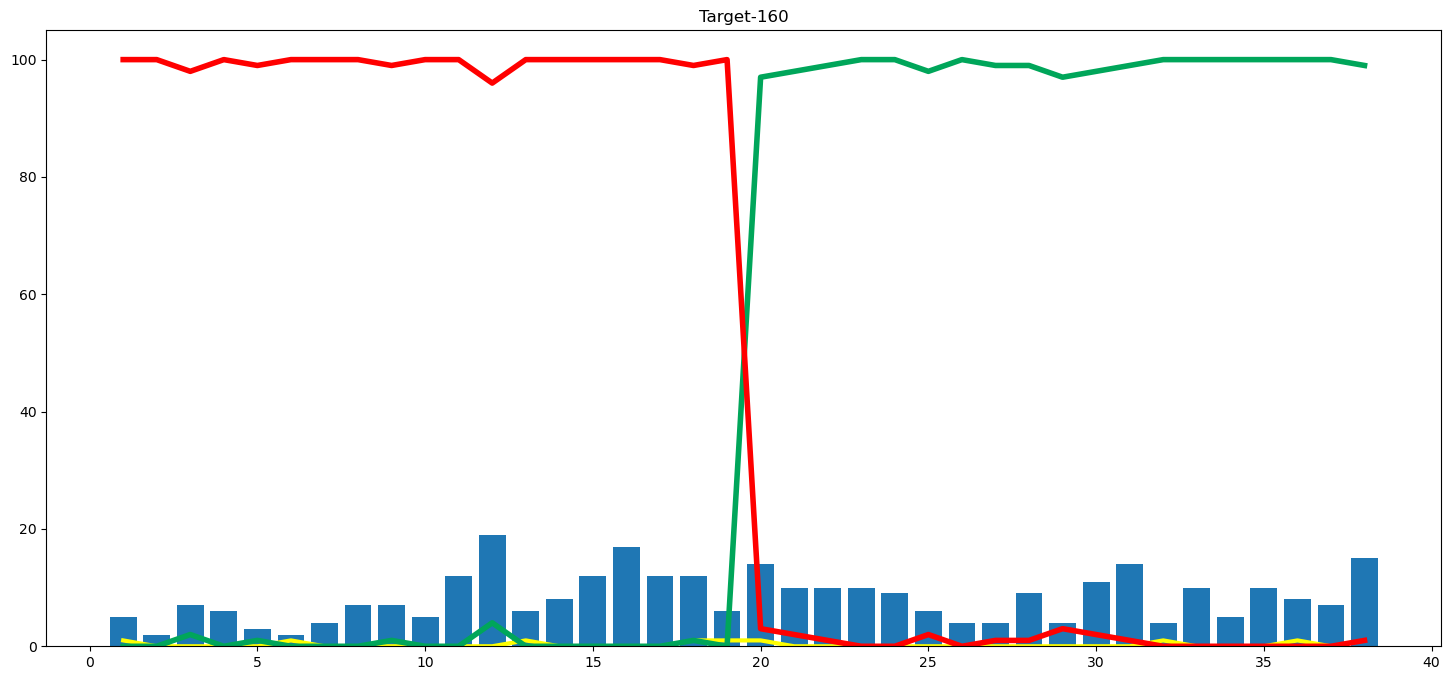

In [251]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [252]:
import pickle

In [110]:
pickle.dump(pipe,open('pipe.pkl','wb'))

In [111]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
154675,Rajasthan Royals,Sunrisers Hyderabad,Jaipur,-25,100,2,160,55.5,-7.5,1


In [255]:
final_df['batting_team'].unique()

array(['Mumbai Indians', 'Kings XI Punjab', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Chennai Super Kings', 'Delhi Daredevils', 'Sunrisers Hyderabad',
       'Deccan Chargers', 'Punjab Kings', 'Gujarat Titans',
       'Gujarat Lions', 'Lucknow Super Giants', 'Delhi Capitals'],
      dtype=object)

In [113]:
final_df['city'].unique()

array(['Bangalore', 'Hyderabad', 'Navi Mumbai', 'Delhi', 'Mumbai',
       'Chennai', 'Abu Dhabi', 'Chandigarh', 'Dubai', 'Jaipur',
       'Bengaluru', 'Kolkata', 'Rajkot', 'Kimberley', 'Centurion',
       'Raipur', 'Pune', 'Visakhapatnam', 'Indore', 'Ahmedabad',
       'Port Elizabeth', 'Mohali', 'Cuttack', 'Durban', 'Johannesburg',
       'Guwahati', 'Dharamsala', 'Ranchi', 'East London', 'Sharjah',
       'Lucknow', 'Nagpur', 'Cape Town', 'Kanpur', 'Bloemfontein'],
      dtype=object)

In [253]:
from joblib import dump, load
dump(pipe, 'model_new.joblib')


['model_new.joblib']

In [254]:
import sklearn
print(sklearn.__version__)

1.5.1
